# Homework 5, Part 2: Answer questions with pandas

**Use the Excel file to answer the following questions.** This is a little more typical of what your data exploration will look like with pandas.

## 0) Setup

Import pandas **with the correct name** .

In [1]:
import pandas as pd

## 1) Reading in an Excel file

Use pandas to read in the `richpeople.xlsx` Excel file, saving it as a variable with the name we'll always use for a dataframe.

> **TIP:** You will use `read_excel` instead of `read_csv`, *but you'll also need to install a new library*. You might need to restart your kernel afterward!

In [2]:
# !pip install openpyxl

df = pd.read_excel('richpeople.xlsx')

## 2) Checking your data

Display the number of rows and columns in your data. Also display the names and data types of each column.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1653 entries, 0 to 1652
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     1653 non-null   int64  
 1   name                     1653 non-null   object 
 2   rank                     1653 non-null   int64  
 3   citizenship              1653 non-null   object 
 4   countrycode              1653 non-null   object 
 5   networthusbillion        1653 non-null   float64
 6   selfmade                 1651 non-null   object 
 7   typeofwealth             1651 non-null   object 
 8   gender                   1653 non-null   object 
 9   age                      1590 non-null   float64
 10  industry                 1652 non-null   object 
 11  IndustryAggregates       1652 non-null   object 
 12  region                   1653 non-null   object 
 13  north                    1653 non-null   int64  
 14  politicalconnection     

## 3) Who are the top 10 richest billionaires? Use the `networthusbillion` column.

In [4]:
df.year

0       2014
1       2014
2       2014
3       2014
4       2014
        ... 
1648    2014
1649    2014
1650    2014
1651    2014
1652    2014
Name: year, Length: 1653, dtype: int64

In [5]:
df.sort_values(by = 'networthusbillion',ascending=False).head(10)

,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
184,2014,Bill Gates,1,United States,USA,76.0,self-made,founder non-finance,male,58.0,...,founder,1975.0,NaN,Microsoft,NaN,NaN,http://www.forbes.com/profile/bill-gates/,NaN,NaN,NaN
226,2014,Carlos Slim Helu,2,Mexico,MEX,72.0,self-made,privatized and resources,male,74.0,...,founder,1990.0,NaN,telecom,NaN,NaN,http://www.ozy.com/provocateurs/carlos-slims-w...,NaN,NaN,NaN
79,2014,Amancio Ortega,3,Spain,ESP,64.0,self-made,founder non-finance,male,77.0,...,founder,1975.0,NaN,retail,NaN,NaN,http://www.forbes.com/profile/amancio-ortega/,NaN,NaN,NaN
1562,2014,Warren Buffett,4,United States,USA,58.2,self-made,founder non-finance,male,83.0,...,founder,1839.0,NaN,Berkshire Hathaway,NaN,NaN,http://www.forbes.com/lists/2009/10/billionair...,http://www.forbes.com/companies/berkshire-hath...,NaN,NaN
862,2014,Larry Ellison,5,United States,USA,48.0,self-made,founder non-finance,male,69.0,...,founder,1977.0,NaN,Oracle,NaN,NaN,http://www.forbes.com/profile/larry-ellison/,http://www.businessinsider.com/how-larry-ellis...,NaN,NaN
339,2014,David Koch,6,United States,USA,40.0,inherited,inherited,male,73.0,...,relation,1940.0,NaN,diversified,inherited from father,NaN,http://www.kochind.com/About_Koch/History_Time...,NaN,NaN,NaN
247,2014,Charles Koch,6,United States,USA,40.0,inherited,inherited,male,78.0,...,relation,1940.0,NaN,diversified,inherited from father,NaN,http://www.kochind.com/About_Koch/History_Time...,NaN,NaN,NaN
1364,2014,Sheldon Adelson,8,United States,USA,38.0,self-made,self-made finance,male,80.0,...,founder,1952.0,NaN,casinos,NaN,NaN,http://www.forbes.com/profile/sheldon-adelson/,http://lasvegassun.com/news/1996/nov/26/rat-pa...,NaN,NaN
280,2014,Christy Walton,9,United States,USA,36.7,inherited,inherited,female,59.0,...,relation,1962.0,NaN,Wal-Mart,widow,NaN,http://www.forbes.com/profile/christy-walton/,NaN,NaN,NaN
724,2014,Jim Walton,10,United States,USA,34.7,inherited,inherited,male,66.0,...,relation,1962.0,NaN,Wal-Mart,inherited from father,NaN,http://www.forbes.com/profile/jim-walton/,NaN,NaN,NaN


## 4) How many male billionaires are there compared to the number of female billionares? What percent is that? Do they have a different average wealth?

> **TIP:** The last part uses `groupby`, but the count/percent part does not.
> **TIP:** When I say "average," you can pick what kind of average you use.

In [6]:
# How many male billionaires are there compared to the number of female billionares?
df.gender.value_counts()

male      1473
female     180
Name: gender, dtype: int64

In [7]:
# What percent is that?
(df.gender.value_counts(normalize=True))*100

male      89.110708
female    10.889292
Name: gender, dtype: float64

In [8]:
# Do they have a different average wealth?
df.groupby(by='gender').networthusbillion.mean()

gender
female    3.920556
male      3.902716
Name: networthusbillion, dtype: float64

## 5) What is the most common source/type of wealth? Is it different between males and females?

> **TIP:** You know how to `groupby` and you know how to count how many times a value is in a column. Can you put them together???
> **TIP:** Use percentages for this, it makes it a lot more readable.

In [9]:
# What is the most common source/type of wealth?
df.groupby(by = 'typeofwealth').count().sort_values(by = 'name', ascending = False)

,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,gender,age,industry,...,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
typeofwealth,,,,,,,,,,,,,,,,,,,,,
inherited,506,506,506,506,506,506,506,506,476,506,...,506,506,0,506,505,106,506,372,121,7
founder non-finance,467,467,467,467,467,467,467,467,449,466,...,467,467,0,454,33,0,467,430,146,3
self-made finance,344,344,344,344,344,344,344,344,338,344,...,343,335,0,344,40,0,344,303,121,2
privatized and resources,192,192,192,192,192,192,192,192,191,192,...,192,192,0,192,74,3,192,180,81,1
executive,142,142,142,142,142,142,142,142,134,142,...,142,140,0,137,31,2,142,129,54,4


In [10]:
# Is it different between males and females?
df.groupby(by = 'typeofwealth').gender.value_counts().sort_values(ascending = False)

typeofwealth              gender
founder non-finance       male      446
inherited                 male      364
self-made finance         male      338
privatized and resources  male      187
inherited                 female    142
executive                 male      136
founder non-finance       female     21
executive                 female      6
self-made finance         female      6
privatized and resources  female      5
Name: gender, dtype: int64

In [11]:
# Is it different between males and females? (Percent by grouped by Type of Wealth)
df.groupby(by = 'typeofwealth').gender.value_counts(normalize = True).sort_index(ascending = False)*100

typeofwealth              gender
self-made finance         male      98.255814
                          female     1.744186
privatized and resources  male      97.395833
                          female     2.604167
inherited                 male      71.936759
                          female    28.063241
founder non-finance       male      95.503212
                          female     4.496788
executive                 male      95.774648
                          female     4.225352
Name: gender, dtype: float64

In [12]:
# Is it different between males and females? (Percent by grouped by Gender)
df.groupby(by = 'gender').typeofwealth.value_counts(normalize = True).sort_index(ascending = False)*100

gender  typeofwealth            
male    self-made finance           22.977566
        privatized and resources    12.712441
        inherited                   24.745071
        founder non-finance         30.319511
        executive                    9.245411
female  self-made finance            3.333333
        privatized and resources     2.777778
        inherited                   78.888889
        founder non-finance         11.666667
        executive                    3.333333
Name: typeofwealth, dtype: float64

## 6) What companies have the most billionaires? Graph the top 5 as a horizontal bar graph.

> **TIP:** First find the answer to the question, then just try to throw `.plot()` on the end
>
> **TIP:** You can use `.head()` on *anything*, not just your basic `df`
>
> **TIP:** You might feel like you should use `groupby`, but don't! There's an easier way to count.
>
> **TIP:** Make the largest bar be at the top of the graph
>
> **TIP:** If your chart seems... weird, think about where in the process you're sorting vs using `head`

In [13]:
df.columns

Index(['year', 'name', 'rank', 'citizenship', 'countrycode',
       'networthusbillion', 'selfmade', 'typeofwealth', 'gender', 'age',
       'industry', 'IndustryAggregates', 'region', 'north',
       'politicalconnection', 'founder', 'generationofinheritance', 'sector',
       'company', 'companytype', 'relationshiptocompany', 'foundingdate',
       'gdpcurrentus', 'sourceofwealth', 'notes', 'notes2', 'source',
       'source_2', 'source_3', 'source_4'],
      dtype='object')

In [14]:
# What companies have the most billionaires?
df.company.value_counts().sort_values(ascending=False).head(5)

Hyatt                  11
Oetker-Gruppe           8
S. C. Johnson & Son     7
Votorantim Group        6
Cargill                 6
Name: company, dtype: int64

<AxesSubplot:title={'center':'Companies with the Most Billionaires'}>

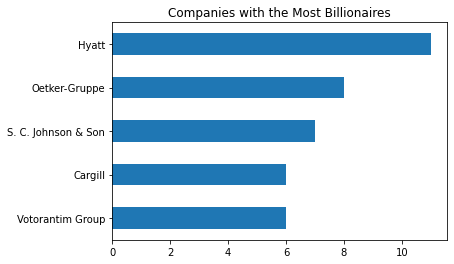

In [15]:
# Graph the top 5 as a horizontal bar graph.
df.company.value_counts().sort_values(ascending=False).head(5).sort_values().plot(kind = 'barh', title = "Companies with the Most Billionaires")

## 7) How much money do these billionaires have in total?

In [16]:
df.head()

,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
0,2014,A. Jerrold Perenchio,663,United States,USA,2.6,self-made,executive,male,83.0,...,former chairman and CEO,1955.0,NaN,"television, Univision",represented Marlon Brando and Elizabeth Taylor,NaN,http://en.wikipedia.org/wiki/Jerry_Perenchio,http://www.forbes.com/profile/a-jerrold-perenc...,COLUMN ONE; A Hollywood Player Who Owns the Ga...,NaN
1,2014,Abdulla Al Futtaim,687,United Arab Emirates,ARE,2.5,inherited,inherited,male,NaN,...,relation,1930.0,NaN,"auto dealers, investments",company split between him and cousin in 2000,NaN,http://en.wikipedia.org/wiki/Al-Futtaim_Group,http://www.al-futtaim.ae/content/groupProfile.asp,NaN,NaN
2,2014,Abdulla bin Ahmad Al Ghurair,305,United Arab Emirates,ARE,4.8,inherited,inherited,male,NaN,...,relation,1960.0,NaN,diversified,inherited from father,NaN,http://en.wikipedia.org/wiki/Al-Ghurair_Group,http://www.alghurair.com/about-us/our-history,NaN,NaN
3,2014,Abdullah Al Rajhi,731,Saudi Arabia,SAU,2.4,self-made,self-made finance,male,NaN,...,founder,1957.0,NaN,banking,NaN,NaN,http://en.wikipedia.org/wiki/Al-Rajhi_Bank,http://www.alrajhibank.com.sa/ar/investor-rela...,http://www.alrajhibank.com.sa/ar/about-us/page...,NaN
4,2014,Abdulsamad Rabiu,1372,Nigeria,NGA,1.2,self-made,founder non-finance,male,54.0,...,founder,1988.0,NaN,"sugar, flour, cement",NaN,NaN,http://www.forbes.com/profile/abdulsamad-rabiu/,http://www.bloomberg.com/research/stocks/priva...,NaN,NaN


In [17]:
df.company.value_counts().sort_values(ascending=False).head(5)

Hyatt                  11
Oetker-Gruppe           8
S. C. Johnson & Son     7
Votorantim Group        6
Cargill                 6
Name: company, dtype: int64

In [18]:
# How much money do these billionaires have in total?
df.networthusbillion.sum()

6454.400000000001

## 8) What are the top 10 countries with the most money held by billionaires?

I am **not** asking which country has the most billionaires - this is **total amount of money per country.**

> **TIP:** Think about it in steps - "I want them organized by country," "I want their net worth," "I want to add it all up," and "I want 10 of them." Just chain it all together.

In [19]:
# What are the top 10 countries with the most money held by billionaires?
df.groupby(by = 'countrycode').networthusbillion.sum().sort_values(ascending = False).head(10)

countrycode
USA    2322.4
RUS     422.5
DEU     401.4
CHN     375.8
FRA     235.3
HKG     213.7
BRA     192.2
IND     191.9
ITA     158.1
GBR     152.0
Name: networthusbillion, dtype: float64

## 9) How old is an average billionaire? How old are self-made billionaires  vs. non self-made billionaires? 

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1653 entries, 0 to 1652
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     1653 non-null   int64  
 1   name                     1653 non-null   object 
 2   rank                     1653 non-null   int64  
 3   citizenship              1653 non-null   object 
 4   countrycode              1653 non-null   object 
 5   networthusbillion        1653 non-null   float64
 6   selfmade                 1651 non-null   object 
 7   typeofwealth             1651 non-null   object 
 8   gender                   1653 non-null   object 
 9   age                      1590 non-null   float64
 10  industry                 1652 non-null   object 
 11  IndustryAggregates       1652 non-null   object 
 12  region                   1653 non-null   object 
 13  north                    1653 non-null   int64  
 14  politicalconnection     

In [21]:
# How old is an average billionaire? 
df.age.mean()

63.34213836477988

In [22]:
# How old are self-made billionaires vs. non self-made billionaires?
df.groupby(by = 'selfmade').age.mean()

selfmade
inherited    64.962185
self-made    62.625899
Name: age, dtype: float64

## 10) Who are the youngest billionaires? Who are the oldest? Make a graph of the distribution of ages.

> **TIP:** You use `.plot()` to graph values in a column independently, but `.hist()` to draw a [histogram](https://www.mathsisfun.com/data/histograms.html) of the distribution of their values

In [23]:
# Who are the youngest billionaires? Who are the oldest? 
df.sort_values(by = 'age').head(10)

,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
1172,2014,Perenna Kei,1284,Hong Kong,HKG,1.3,inherited,inherited,female,24.0,...,relation,1996.0,NaN,real estate,inherited from father,NaN,http://en.wikipedia.org/wiki/Perenna_Kei,http://www.loganestate.com/en/about.aspx?ftid=294,NaN,NaN
397,2014,Dustin Moskovitz,202,United States,USA,6.8,self-made,founder non-finance,male,29.0,...,founder,2004.0,NaN,Facebook,NaN,NaN,http://en.wikipedia.org/wiki/Dustin_Moskovitz,http://www.forbes.com/profile/dustin-moskovitz/,https://www.facebook.com/facebook/info?tab=pag...,NaN
1004,2014,Mark Zuckerberg,21,United States,USA,28.5,self-made,founder non-finance,male,29.0,...,founder,2004.0,NaN,Facebook,NaN,NaN,http://www.forbes.com/profile/mark-zuckerberg/,NaN,NaN,NaN
127,2014,"Anton Kathrein, Jr.",1270,Germany,DEU,1.4,inherited,inherited,male,29.0,...,relation,1919.0,NaN,antennas,3rd generation,NaN,http://www.forbes.com/profile/anton-kathrein-jr/#,NaN,NaN,NaN
394,2014,Drew Houston,1372,United States,USA,1.2,self-made,founder non-finance,male,30.0,...,founder,2007.0,NaN,Dropbox,NaN,NaN,http://en.wikipedia.org/wiki/Drew_Houston,http://en.wikipedia.org/wiki/Dropbox_(service),http://www.forbes.com/profile/drew-houston/,NaN
28,2014,Albert von Thurn und Taxis,1092,Germany,DEU,1.6,inherited,inherited,male,30.0,...,relation,1615.0,NaN,diversified,"monopoly on postal service in germany, nationa...","two older sisters, did not inherit title becau...",http://en.wikipedia.org/wiki/Thurn_und_Taxis,"http://en.wikipedia.org/wiki/Albert,_12th_Prin...",NaN,NaN
406,2014,Eduardo Saverin,367,Brazil,BRA,4.1,self-made,founder non-finance,male,31.0,...,founder,2004.0,NaN,Facebook,NaN,NaN,http://en.wikipedia.org/wiki/Eduardo_Saverin,http://www.bloomberg.com/news/articles/2012-05...,NaN,NaN
1340,2014,Scott Duncan,215,United States,USA,6.3,inherited,inherited,male,31.0,...,relation,1968.0,NaN,pipelines,inherited from father,NaN,http://en.wikipedia.org/wiki/Scott_Duncan_(bus...,http://www.forbes.com/profile/dannine-avara/,NaN,NaN
1607,2014,Yang Huiyan,196,China,CHN,6.9,inherited,inherited,female,32.0,...,relation,1997.0,NaN,real estate,inherited from father,NaN,http://en.wikipedia.org/wiki/Yang_Huiyan,NaN,NaN,NaN
991,2014,Marie Besnier Beauvalot,642,France,FRA,2.7,inherited,inherited,female,33.0,...,relation,1933.0,NaN,cheese,inherited from father,oldest brother is CEO,http://www.forbes.com/profile/emmanuel-besnier/,http://en.wikipedia.org/wiki/Lactalis,NaN,NaN


In [24]:
# Who are the oldest? 
df.sort_values(by = 'age', na_position='first').tail(10)


,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
1585,2014,"William Moncrief, Jr.",1565,United States,USA,1.0,inherited,inherited,male,93.0,...,relation,1929.0,NaN,oil,joined father's business following WWII,NaN,http://en.wikipedia.org/wiki/William_Moncrief,http://www.moncriefoil.com/history.htm,NaN,NaN
77,2014,Aloysio de Andrade Faria,483,Brazil,BRA,3.3,inherited,inherited,male,93.0,...,relation,1925.0,NaN,banking,inherited from father,NaN,http://en.wikipedia.org/wiki/Aloysio_de_Andrad...,http://en.wikipedia.org/wiki/Banco_da_Lavoura_...,http://www.forbes.com/profile/aloysio-de-andra...,NaN
122,2014,Anne Cox Chambers,58,United States,USA,15.5,inherited,inherited,female,94.0,...,relation,1898.0,NaN,media,inherited from brother,NaN,http://en.wikipedia.org/wiki/Anne_Cox_Chambers,http://www.forbes.com/lists/2010/10/billionair...,http://www.nytimes.com/2007/05/30/business/med...,NaN
1428,2014,Sulaiman Al Rajhi,931,Saudi Arabia,SAU,1.9,self-made,self-made finance,male,94.0,...,founder,1957.0,NaN,banking,NaN,NaN,http://en.wikipedia.org/wiki/Al-Rajhi_Bank,http://www.alrajhibank.com.sa/ar/investor-rela...,http://www.alrajhibank.com.sa/ar/about-us/page...,NaN
815,2014,Karl Albrecht,23,Germany,DEU,25.0,self-made,executive,male,94.0,...,relation,1914.0,NaN,retail,"(split from Aldi Nord in 1966, but both branch...",took over mother's single grocerty store,http://en.wikipedia.org/wiki/Karl_Albrecht,http://www.bloomberg.com/news/articles/2014-07...,http://aldiuscareers.com/about-aldi/history,NaN
435,2014,Erika Pohl-Stroher,1154,Germany,DEU,1.5,inherited,inherited,female,95.0,...,relation,1880.0,NaN,hair products,3rd generation,23% stake in the company,http://www.forbes.com/profile/erika-pohl-stroher/,http://en.wikipedia.org/wiki/Wella,NaN,NaN
588,2014,Henry Hillman,687,United States,USA,2.5,inherited,inherited,male,95.0,...,relation,1942.0,NaN,investments,inherited from father,NaN,http://www.forbes.com/profile/henry-hillman/,http://en.wikipedia.org/wiki/Calgon_Carbon,NaN,NaN
836,2014,Kirk Kerkorian,328,United States,USA,4.5,self-made,self-made finance,male,96.0,...,investor,1924.0,NaN,"casinos, investments",purchased in 1969,NaN,http://en.wikipedia.org/wiki/Kirk_Kerkorian,http://www.forbes.com/profile/kirk-kerkorian/,PROFILE: Las Vegas billionaire amassed his wea...,NaN
816,2014,Karl Wlaschek,305,Austria,AUT,4.8,self-made,founder non-finance,male,96.0,...,founder,1953.0,NaN,retail,NaN,NaN,http://en.wikipedia.org/wiki/BILLA,http://en.wikipedia.org/wiki/Karl_Wlaschek,https://www.billa.at/Footer_Nav_Seiten/Geschic...,NaN
343,2014,"David Rockefeller, Sr.",580,United States,USA,2.9,inherited,inherited,male,98.0,...,relation,1870.0,NaN,"oil, banking",family made most of fortune in the late 19th a...,NaN,http://en.wikipedia.org/wiki/David_Rockefeller,http://en.wikipedia.org/wiki/Standard_Oil,http://en.wikipedia.org/wiki/Rockefeller_family,NaN


<AxesSubplot:title={'center':'Age distribution of Billionaires'}, ylabel='Frequency'>

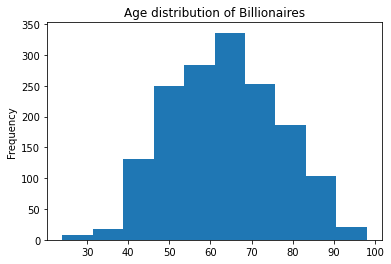

In [25]:
# Make a graph of the distribution of ages.
df.age.plot(kind='hist', title = "Age distribution of Billionaires")

## 11) Make a scatterplot of net worth compared to age

<AxesSubplot:xlabel='networthusbillion', ylabel='age'>

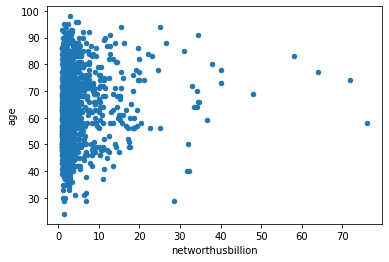

In [26]:
df.plot(kind = 'scatter', x = 'networthusbillion', y = 'age')

<AxesSubplot:title={'center':'Wealth of Billionaires (USD) by Age'}, xlabel='age', ylabel='networthusbillion'>

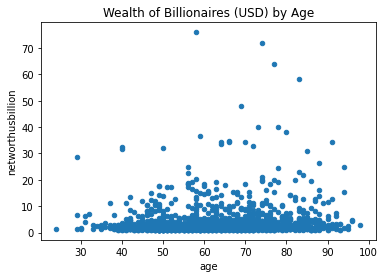

In [27]:
# Make a scatterplot of net worth compared to age
df.plot(kind = 'scatter', y = 'networthusbillion', x = 'age', title = "Wealth of Billionaires (USD) by Age")

## 13) Make a bar graph of the wealth of the top 10 richest billionaires

> **TIP:** When you make your plot, you'll need to set the `x` and `y` or else your chart will look _crazy_
>
> **TIP:** x and y might be the opposite of what you expect them to be

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1653 entries, 0 to 1652
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     1653 non-null   int64  
 1   name                     1653 non-null   object 
 2   rank                     1653 non-null   int64  
 3   citizenship              1653 non-null   object 
 4   countrycode              1653 non-null   object 
 5   networthusbillion        1653 non-null   float64
 6   selfmade                 1651 non-null   object 
 7   typeofwealth             1651 non-null   object 
 8   gender                   1653 non-null   object 
 9   age                      1590 non-null   float64
 10  industry                 1652 non-null   object 
 11  IndustryAggregates       1652 non-null   object 
 12  region                   1653 non-null   object 
 13  north                    1653 non-null   int64  
 14  politicalconnection     

<AxesSubplot:title={'center':'Wealth of the Top 10 Richest Billionaires (in USD)'}, ylabel='name'>

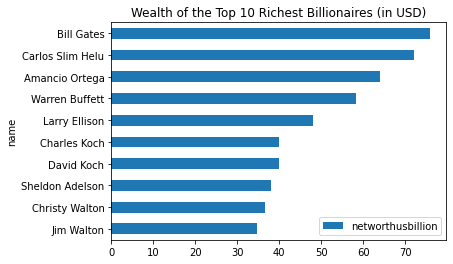

In [29]:
# Make a bar graph of the wealth of the top 10 richest billionaires
df.sort_values(by = 'networthusbillion', ascending=False).head(10).sort_values(by = 'networthusbillion').plot(kind = "barh", y = 'networthusbillion', x = 'name', title = "Wealth of the Top 10 Richest Billionaires (in USD)")